<a href="https://colab.research.google.com/github/abhinay-2006/SML/blob/main/SML_Assignment_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv('/content/archive (33).zip')
print(data.head())

   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0   42  FEMALE   0.95256   2.15000  0.007972 -0.048340           II   
1   54  FEMALE   0.00000   1.38020 -0.498030 -0.507320           II   
2   63  FEMALE  -0.52303   1.76400 -0.370190  0.010815           II   
3   78  FEMALE  -0.87618   0.12943 -0.370380  0.132190            I   
4   42  FEMALE   0.22611   1.74910 -0.543970 -0.390210           II   

                       Histology ER status PR status HER2 status Surgery_type  \
0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   Lumpectomy   
3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
4  Infiltrating Ductal Carcinoma  Positive  Positive    Positive   Lumpectomy   

  Date_of_Surgery Date_of_Last_Visit Patient_Status  
0       20-May-18          26-Au

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
file_path = '/content/archive (33).zip'
data = pd.read_csv(file_path)
label_encoders = {}
categorical_columns = ['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type', 'Patient_Status']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
data_cleaned = data.drop(['Date_of_Surgery', 'Date_of_Last_Visit'], axis=1)

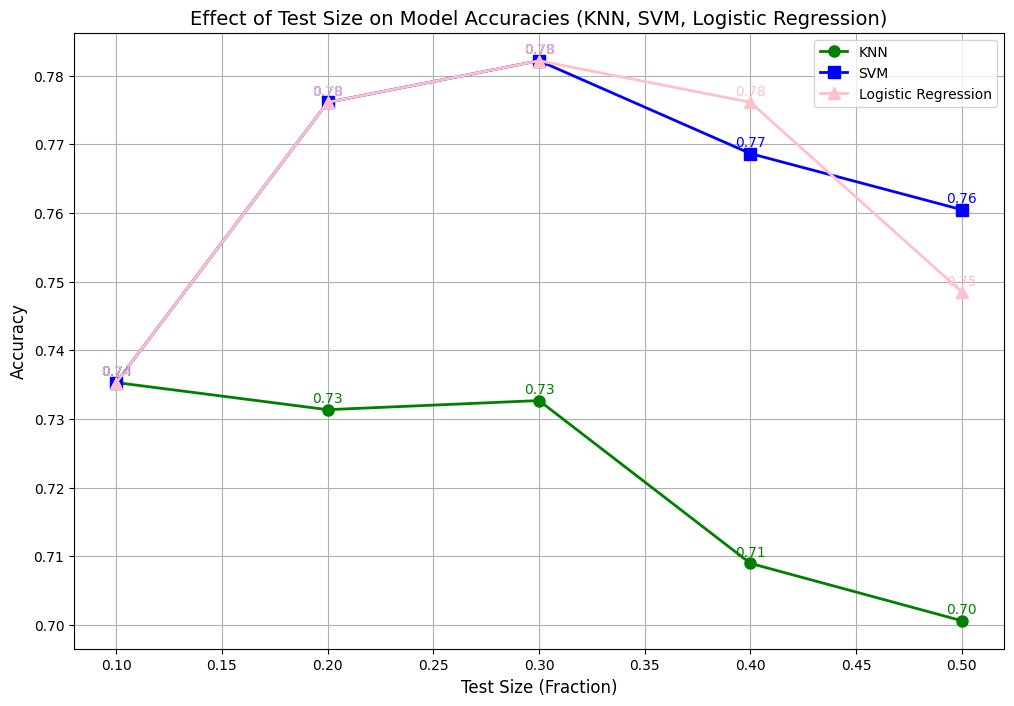

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
X = data_cleaned.drop('Patient_Status', axis=1)
y = data_cleaned['Patient_Status']
scaler = StandardScaler()
X = scaler.fit_transform(X)
def evaluate_models_with_test_sizes(test_sizes):
    knn_results = []
    svm_results = []
    lr_results = []
    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train, y_train)
        y_pred_knn = knn.predict(X_test)
        knn_accuracy = accuracy_score(y_test, y_pred_knn)
        knn_results.append((test_size, knn_accuracy))
        svm = SVC()
        svm.fit(X_train, y_train)
        y_pred_svm = svm.predict(X_test)
        svm_accuracy = accuracy_score(y_test, y_pred_svm)
        svm_results.append((test_size, svm_accuracy))
        lr = LogisticRegression(max_iter=1000)
        lr.fit(X_train, y_train)
        y_pred_lr = lr.predict(X_test)
        lr_accuracy = accuracy_score(y_test, y_pred_lr)
        lr_results.append((test_size, lr_accuracy))
    return knn_results, svm_results, lr_results
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]
knn_results, svm_results, lr_results = evaluate_models_with_test_sizes(test_sizes)
test_sizes_knn = [x[0] for x in knn_results]
accuracies_knn = [x[1] for x in knn_results]
test_sizes_svm = [x[0] for x in svm_results]
accuracies_svm = [x[1] for x in svm_results]
test_sizes_lr = [x[0] for x in lr_results]
accuracies_lr = [x[1] for x in lr_results]
plt.figure(figsize=(12, 8))
plt.plot(test_sizes_knn, accuracies_knn, marker='o', linestyle='-', color='green', markersize=8, linewidth=2, label='KNN')
plt.plot(test_sizes_svm, accuracies_svm, marker='s', linestyle='-', color='blue', markersize=8, linewidth=2, label='SVM')
plt.plot(test_sizes_lr, accuracies_lr, marker='^', linestyle='-', color='pink', markersize=8, linewidth=2, label='Logistic Regression')
for i, txt in enumerate(accuracies_knn):
    plt.annotate(f"{txt:.2f}", (test_sizes_knn[i], accuracies_knn[i]), textcoords="offset points", xytext=(0,5), ha='center', color='green')
for i, txt in enumerate(accuracies_svm):
    plt.annotate(f"{txt:.2f}", (test_sizes_svm[i], accuracies_svm[i]), textcoords="offset points", xytext=(0,5), ha='center', color='blue')
for i, txt in enumerate(accuracies_lr):
    plt.annotate(f"{txt:.2f}", (test_sizes_lr[i], accuracies_lr[i]), textcoords="offset points", xytext=(0,5), ha='center', color='pink')
plt.title('Effect of Test Size on Model Accuracies (KNN, SVM, Logistic Regression)', fontsize=14)
plt.xlabel('Test Size (Fraction)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [4]:
print("Accuracy Results for Different Test Sizes:")
for i, test_size in enumerate(test_sizes):
    print(f"Test Size: {test_size}")
    print(f"  KNN Accuracy: {knn_results[i][1]:.4f}")
    print(f"  SVM Accuracy: {svm_results[i][1]:.4f}")
    print(f"  Logistic Regression Accuracy: {lr_results[i][1]:.4f}")

Accuracy Results for Different Test Sizes:
Test Size: 0.1
  KNN Accuracy: 0.7353
  SVM Accuracy: 0.7353
  Logistic Regression Accuracy: 0.7353
Test Size: 0.2
  KNN Accuracy: 0.7313
  SVM Accuracy: 0.7761
  Logistic Regression Accuracy: 0.7761
Test Size: 0.3
  KNN Accuracy: 0.7327
  SVM Accuracy: 0.7822
  Logistic Regression Accuracy: 0.7822
Test Size: 0.4
  KNN Accuracy: 0.7090
  SVM Accuracy: 0.7687
  Logistic Regression Accuracy: 0.7761
Test Size: 0.5
  KNN Accuracy: 0.7006
  SVM Accuracy: 0.7605
  Logistic Regression Accuracy: 0.7485


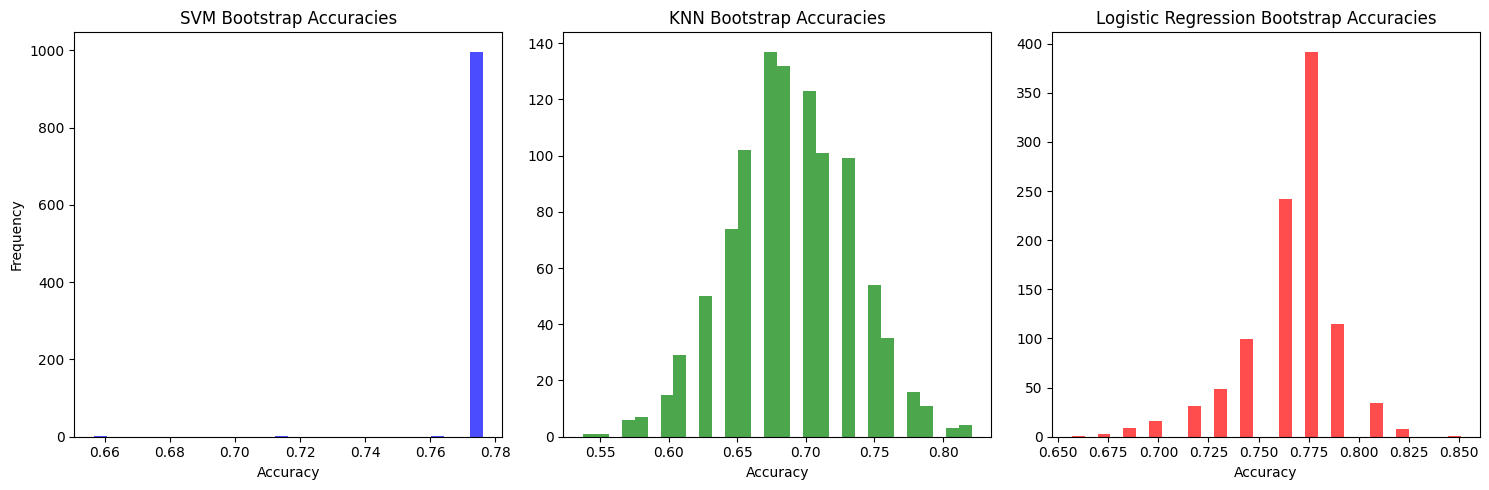

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
data = pd.read_csv('/content/archive (33).zip')
categorical_cols = ['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    data[col] = label_encoders[col].fit_transform(data[col])
data['Patient_Status'] = data['Patient_Status'].apply(lambda x: 1 if x == 'Alive' else 0)
X = data.drop(columns=['Patient_Status', 'Date_of_Surgery', 'Date_of_Last_Visit'])
y = data['Patient_Status']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
def bootstrap_model(model, X_train, y_train, X_test, y_test, n_iterations=1000):
    accuracies = []
    for _ in range(n_iterations):
        X_resampled, y_resampled = resample(X_train, y_train, random_state=None)
        model.fit(X_resampled, y_resampled)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    return accuracies
svm = SVC(kernel='linear', random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
log_reg = LogisticRegression(random_state=42)
svm_accuracies = bootstrap_model(svm, X_train, y_train, X_test, y_test)
knn_accuracies = bootstrap_model(knn, X_train, y_train, X_test, y_test)
log_reg_accuracies = bootstrap_model(log_reg, X_train, y_train, X_test, y_test)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(svm_accuracies, bins=30, color='b', alpha=0.7)
plt.title('SVM Bootstrap Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.subplot(1, 3, 2)
plt.hist(knn_accuracies, bins=30, color='g', alpha=0.7)
plt.title('KNN Bootstrap Accuracies')
plt.xlabel('Accuracy')
plt.subplot(1, 3, 3)
plt.hist(log_reg_accuracies, bins=30, color='r', alpha=0.7)
plt.title('Logistic Regression Bootstrap Accuracies')
plt.xlabel('Accuracy')
plt.tight_layout()
plt.show()
